# Packages

In [658]:
from services.data_manipulation import impute_with_knn_fancy, impute_with_normal_distribution, scale_data
import pandas as pd
import numpy as np
import seaborn as sns

# Data load

In [659]:

# import the dataset
df = pd.read_csv('data/Student_performance_data.csv')

df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [660]:
# Remove redundant variables
df.drop(['StudentID', 'Gender', 'Ethnicity' ], axis=1, inplace=True)

In [661]:
df.dtypes

Age                    int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass           float64
dtype: object

In [662]:
df.shape

(2392, 12)

In [663]:
# Check for duplicate rows
df_dupli = df.drop_duplicates()
df_dupli.shape

(2392, 12)

# Data preprocessing

In [664]:
# Check for null values
null_values = df.isnull().sum() / len(df)
null_values


Age                  0.0
ParentalEducation    0.0
StudyTimeWeekly      0.0
Absences             0.0
Tutoring             0.0
ParentalSupport      0.0
Extracurricular      0.0
Sports               0.0
Music                0.0
Volunteering         0.0
GPA                  0.0
GradeClass           0.0
dtype: float64

In [665]:
df.columns

Index(['Age', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring',
       'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering',
       'GPA', 'GradeClass'],
      dtype='object')

In [666]:
# Define categorical features and Continuous features
categorical_features = ['ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Extracurricular']
continuous_features = ['Age', 'StudyTimeWeekly', 'Absences']
target = ['GPA']

In [667]:
# Use one hot encoding for categorical features
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [668]:
df.head(5)

,Age,StudyTimeWeekly,Absences,Volunteering,GPA,GradeClass,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,Tutoring_1,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4,Extracurricular_1,Sports_1,Music_1,Extracurricular_1
0,17,19.833723,7,0,2.929196,2.0,False,True,False,False,True,False,True,False,False,False,False,True,False
1,18,15.408756,0,0,3.042915,1.0,True,False,False,False,False,True,False,False,False,False,False,False,False
2,15,4.210570,26,0,0.112602,4.0,False,False,True,False,False,False,True,False,False,False,False,False,False
3,17,10.028829,14,0,2.054218,3.0,False,False,True,False,False,False,False,True,False,True,False,False,True
4,17,4.672495,17,0,1.288061,4.0,False,True,False,False,True,False,False,True,False,False,False,False,False


In [669]:
# Check for negative values in the continuous features
df = df[df['Age'] >= 0]
df = df[df['Absences'] >= 0]
df = df[df['StudyTimeWeekly'] >= 0]
df = df[df['GPA'] >= 0]

/tmp/ipykernel_79122/4292732723.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GPA'])


<Axes: xlabel='GPA', ylabel='Density'>

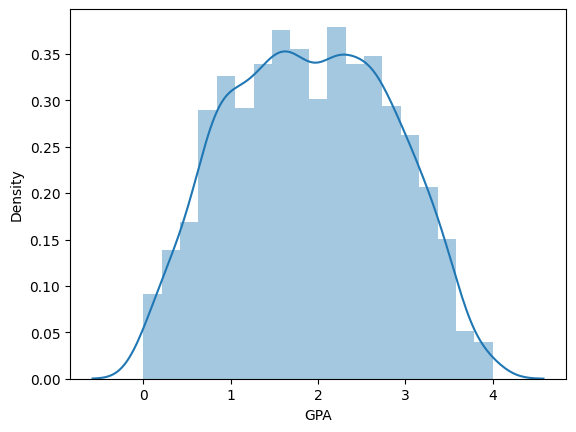

In [670]:
# Plot the distribution of 'GPA'
sns.distplot(df['GPA'])


/tmp/ipykernel_79122/821936888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['StudyTimeWeekly'])


<Axes: xlabel='StudyTimeWeekly', ylabel='Density'>

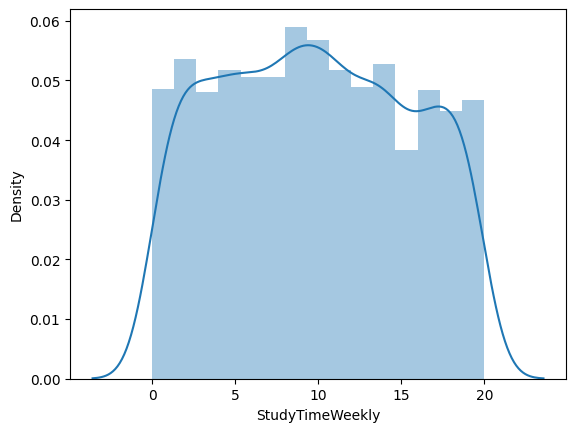

In [671]:
sns.distplot(df['StudyTimeWeekly'])

/tmp/ipykernel_79122/4042516184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Absences'])


<Axes: xlabel='Absences', ylabel='Density'>

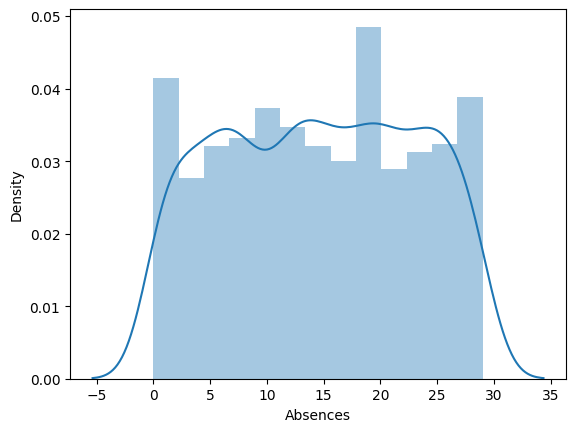

In [672]:
sns.distplot(df['Absences'])

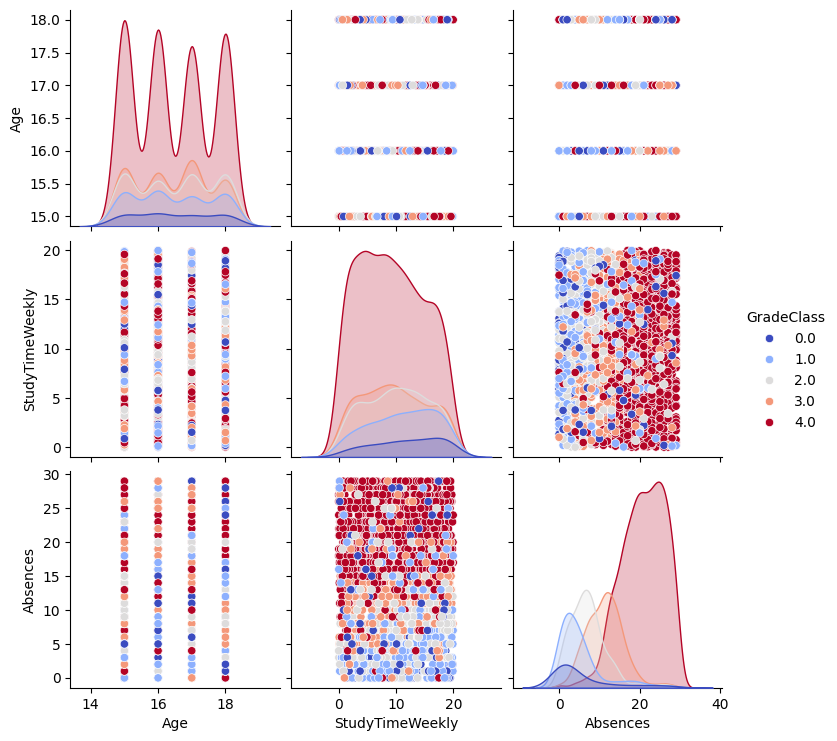

In [673]:
# Plot the correlation between continuous features (hue 'GradeClass')
sns.pairplot(df[continuous_features + ['GradeClass']], hue='GradeClass', palette='coolwarm')


In [674]:
df['GradeClass'].value_counts()

GradeClass
4.0    1211
3.0     414
2.0     391
1.0     269
0.0     107
Name: count, dtype: int64

In [675]:
df.describe()

,Age,StudyTimeWeekly,Absences,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388,0.157191,1.906186,2.983696
std,1.123798,5.652774,8.467417,0.364057,0.915156,1.233908
min,15.000000,0.001057,0.000000,0.000000,0.000000,0.000000
25%,15.000000,5.043079,7.000000,0.000000,1.174803,2.000000
50%,16.000000,9.705363,15.000000,0.000000,1.893393,4.000000
75%,17.000000,14.408410,22.000000,0.000000,2.622216,4.000000
max,18.000000,19.978094,29.000000,1.000000,4.000000,4.000000


In [676]:
# Check for skewness in the data
df.skew()

Age                    0.035793
StudyTimeWeekly        0.050068
Absences              -0.026017
Volunteering           1.884851
GPA                    0.014526
GradeClass            -0.900807
ParentalEducation_1    0.850954
ParentalEducation_2    0.449316
ParentalEducation_3    1.924471
ParentalEducation_4    4.124012
Tutoring_1             0.866045
ParentalSupport_1      1.466723
ParentalSupport_2      0.825366
ParentalSupport_3      0.918759
ParentalSupport_4      2.558189
Extracurricular_1      0.480094
Sports_1               0.855253
Music_1                1.525339
Extracurricular_1      0.480094
dtype: float64

<Axes: >

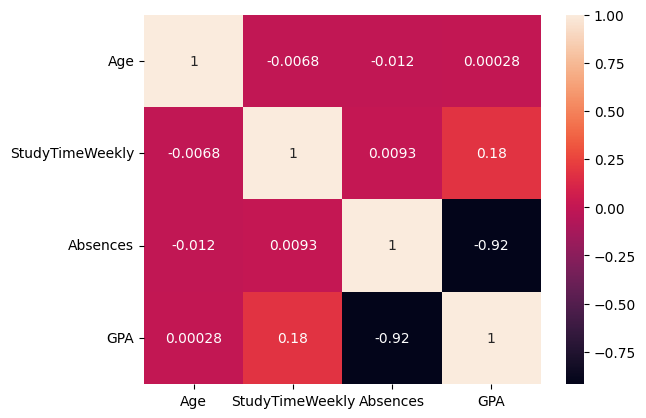

In [677]:
# Plot the correlation matrix between continuous features
features = continuous_features + target
sns.heatmap(df[features].corr(), annot=True)

In [678]:
df.drop(columns='GradeClass', inplace=True)

# Scenario 1 - Remove features based on AdaBoost regressor

In [679]:
db_scen1 = df.copy()

In [680]:
# # Create a decision tree, plot the most important features
# from sklearn.ensemble import AdaBoostRegressor
# dtree = AdaBoostRegressor(n_estimators=1000,learning_rate=0.1, random_state=42)
# X = db_scen1.drop(columns='GPA')
# y = db_scen1['GPA']
# dtree.fit(X, y)
# feature_importances = pd.DataFrame(dtree.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

In [ ]:
# threshold = 0.01
# # Remove features with importances below 0.001
# important_features = feature_importances[feature_importances['Importance'] > threshold]
# db_scen1 = db_scen1.drop(columns=feature_importances[feature_importances['Importance'] < threshold].index)
# 

In [682]:
db_scen1

,Age,StudyTimeWeekly,Absences,Volunteering,GPA,ParentalEducation_1,ParentalEducation_2,ParentalEducation_3,ParentalEducation_4,Tutoring_1,ParentalSupport_1,ParentalSupport_2,ParentalSupport_3,ParentalSupport_4,Extracurricular_1,Sports_1,Music_1,Extracurricular_1
0,17,19.833723,7,0,2.929196,False,True,False,False,True,False,True,False,False,False,False,True,False
1,18,15.408756,0,0,3.042915,True,False,False,False,False,True,False,False,False,False,False,False,False
2,15,4.210570,26,0,0.112602,False,False,True,False,False,False,True,False,False,False,False,False,False
3,17,10.028829,14,0,2.054218,False,False,True,False,False,False,False,True,False,True,False,False,True
4,17,4.672495,17,0,1.288061,False,True,False,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,10.680555,2,0,3.455509,False,False,True,False,False,False,False,False,True,True,False,False,True
2388,17,7.583217,4,0,3.279150,True,False,False,False,True,False,False,False,True,False,True,False,False
2389,16,6.805500,20,1,1.142333,False,True,False,False,False,False,True,False,False,False,False,False,False
2390,16,12.416653,17,0,1.803297,False,False,False,False,False,False,True,False,False,False,True,True,False


In [683]:
scale_data(db_scen1, ['StudyTimeWeekly', 'Absences', 'Age'] )

In [ ]:
db_scen1.to_csv('data/scenarios/new_sc1.csv')

: 

# TSNE

In [ ]:
# # Drop 'Passed' column
# from sklearn.manifold import TSNE
# X = df.drop(columns='GPA', 'GradeClass')
# X

In [ ]:

# tsne = TSNE(n_components=2, random_state=42)
# X_embedded = tsne.fit_transform(X.dropna(),df['GradeClass'])

In [ ]:
# X

In [ ]:
# df_n = df.dropna()

In [ ]:
# # Plot the t-SNE representation with seaborn
# sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=df_n['GradeClass'])


In [ ]:
# df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,33467.000000,33467.000000,33467.000000
mean,10.266367,75.323295,65.415221
std,4.713621,20.356805,16.504220
min,-0.000000,0.500000,8.300000
25%,6.900000,61.600000,55.000000
50%,10.100000,75.300000,65.200000
75%,13.500000,88.800000,75.200000
max,32.400000,150.200000,200.000000


In [ ]:
# # Check for outliers (within 3 standard deviations)
# outliers = df[continuous_features].apply(lambda x: x[(np.abs(x - x.mean()) > (3 * x.std()))])
# # Count the number of outliers

# outliers.sum()

Study Hours per Week     1705.2
Attendance Rate         16798.4
Previous Grades         19832.0
dtype: float64